In [1]:
# Data Processing
import numpy as np 
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\hp\\Documents\\Notebook'

In [4]:
df_train = pd.read_csv('DSStrain.csv')
df_test = pd.read_csv('DSStest.csv')

In [5]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
df_train.shape

(381109, 12)

In [7]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [8]:
df_train = df_train.drop(['id'], axis=1)
df_test = df_test.drop(['id'], axis=1)

In [9]:
df_train.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [10]:
df_train.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [11]:
df_test.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [12]:
df_train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

Text(0.5, 1.0, 'Response Distribution')

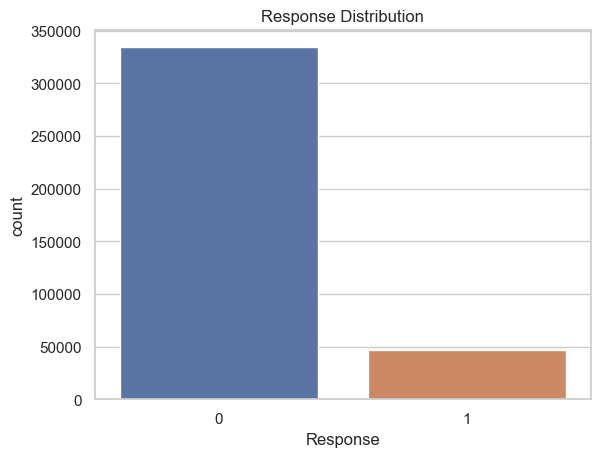

In [13]:
b = sns.countplot(x='Response', data=df_train)
b.set_title("Response Distribution")

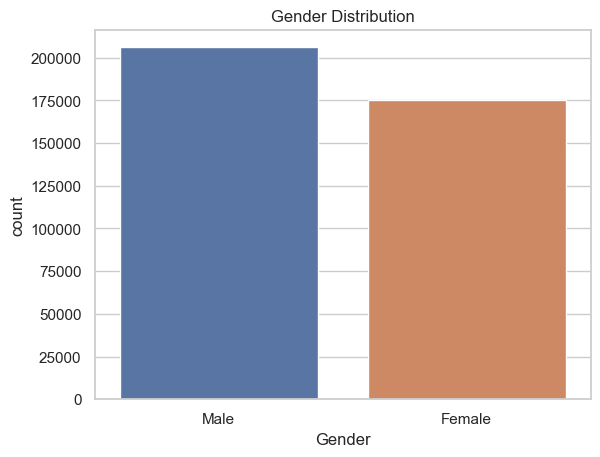

In [14]:
b = sns.countplot(x='Gender', data=df_train)
b.set_title("Gender Distribution");

In [15]:
df_copy=df_train
def bar_chart(colunm):
    intrested=df_copy[df_copy["Response"]==1][colunm].value_counts()
    Not_interested=df_copy[df_copy["Response"]==0][colunm].value_counts()
    
    df_new=pd.DataFrame([intrested,Not_interested])
    df_new.index=["Customer is interested","Customer is Not interested"]
    df_new.plot(kind="bar",stacked=False,figsize=(8,4))
    plt.title("Response distribution for Gender")
    plt.ylabel("Amount")
    plt.legend(["Female", "Male"])
    plt.xticks(rotation=0);

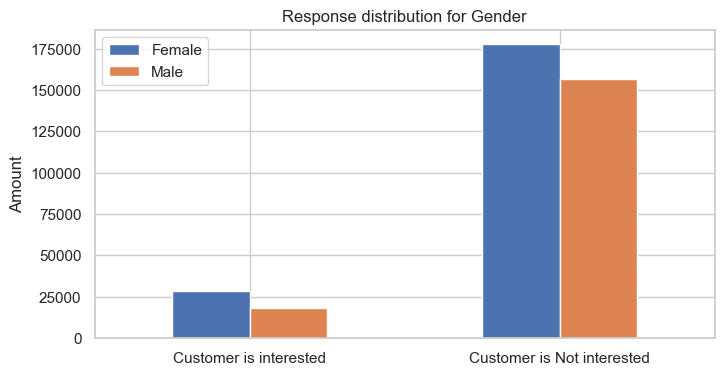

In [16]:
bar_chart("Gender")

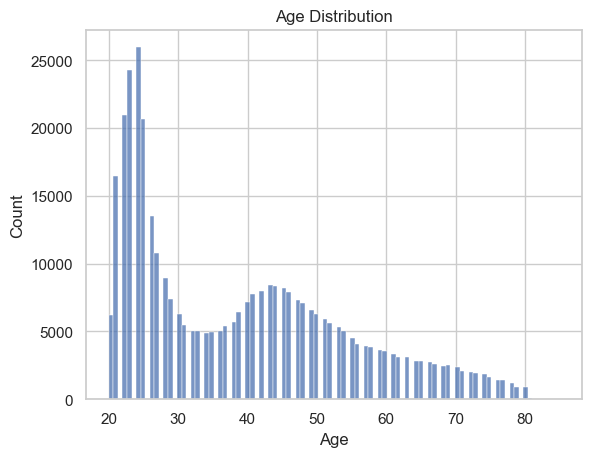

In [17]:
b = sns.histplot(df_train['Age'])
b.set_title("Age Distribution");

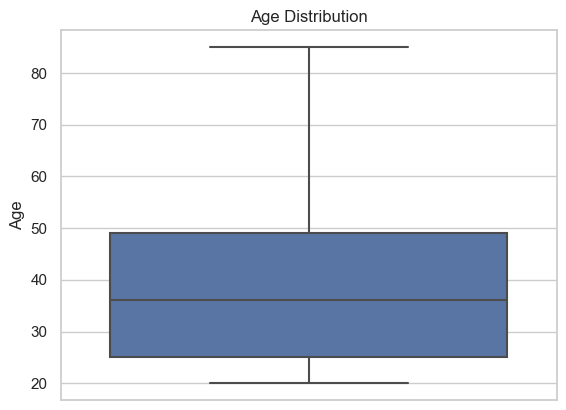

In [18]:
b = sns.boxplot(y = 'Age', data = df_train)
b.set_title("Age Distribution");

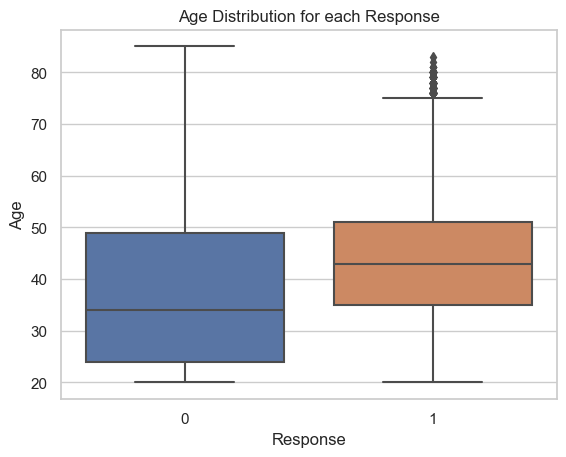

In [19]:
b = sns.boxplot(y='Age', x='Response', data=df_train);
b.set_title("Age Distribution for each Response");

In [20]:
df_train['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [21]:
df_train = df_train.drop("Driving_License", axis=1)
df_test = df_test.drop("Driving_License", axis=1)

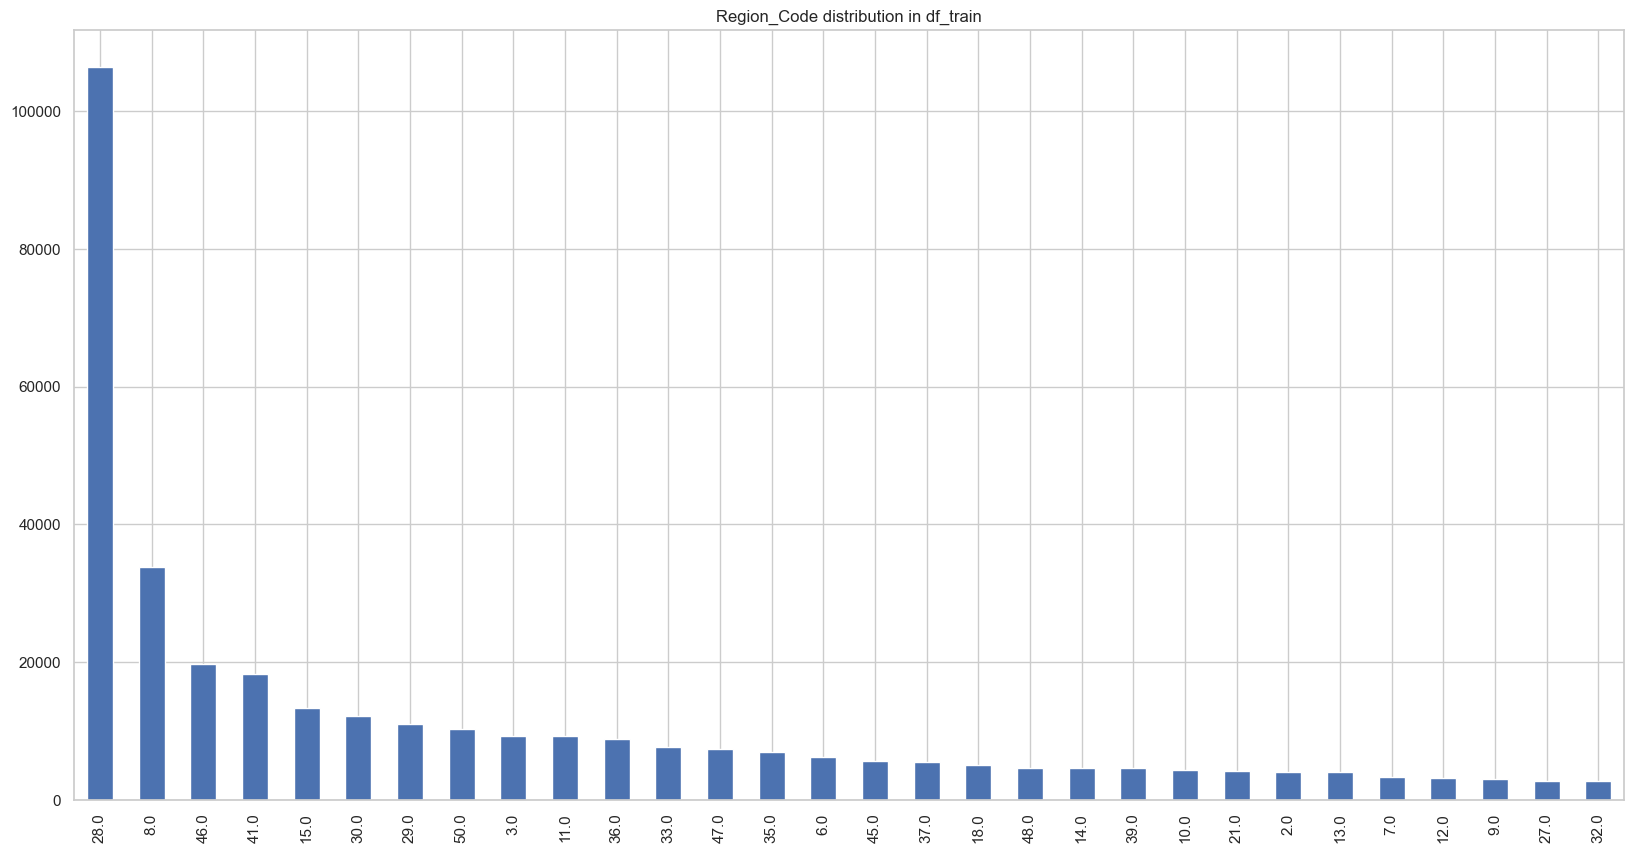

In [22]:
df_train['Region_Code'].value_counts().head(30).plot(kind='bar', figsize=(20,10),
                                                     title="Region_Code distribution in df_train");


In [23]:
df_train['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [24]:
pd.crosstab(df_train['Response'], df_train['Previously_Insured'])

Previously_Insured,0,1
Response,,
0,159929,174470
1,46552,158


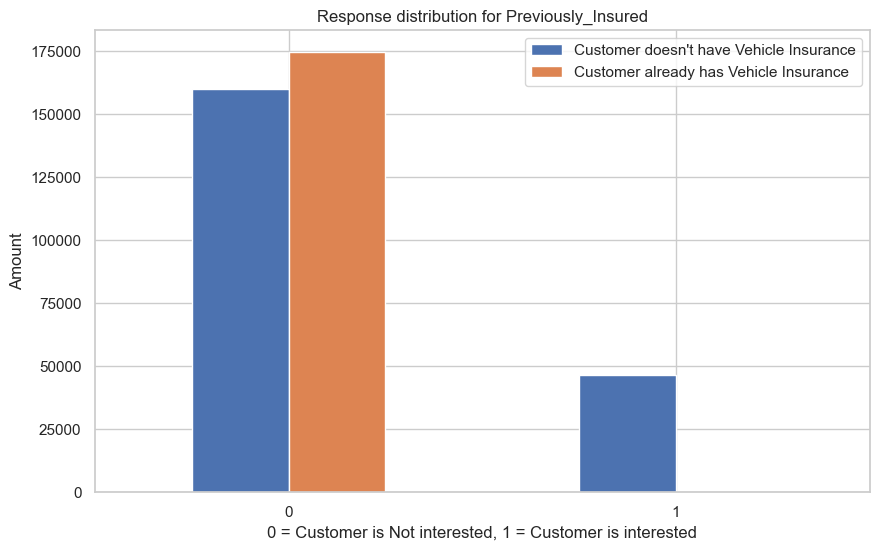

In [25]:
pd.crosstab(df_train['Response'], df_train['Previously_Insured']).plot(kind="bar", figsize=(10,6))

plt.title("Response distribution for Previously_Insured")
plt.xlabel("0 = Customer is Not interested, 1 = Customer is interested")
plt.ylabel("Amount")
plt.legend(["Customer doesn't have Vehicle Insurance", "Customer already has Vehicle Insurance"])
plt.xticks(rotation=0);

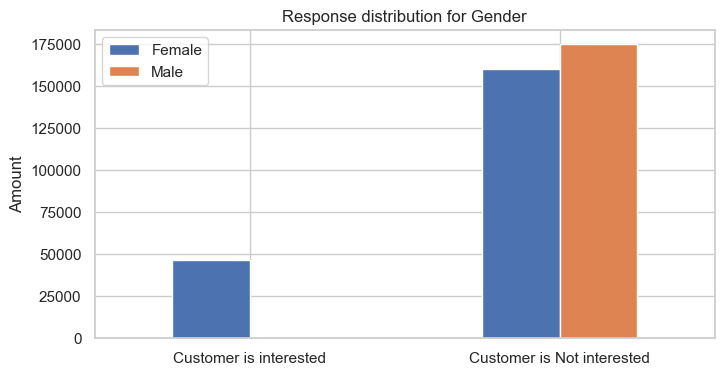

In [26]:
bar_chart("Previously_Insured")

In [27]:
df_train['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

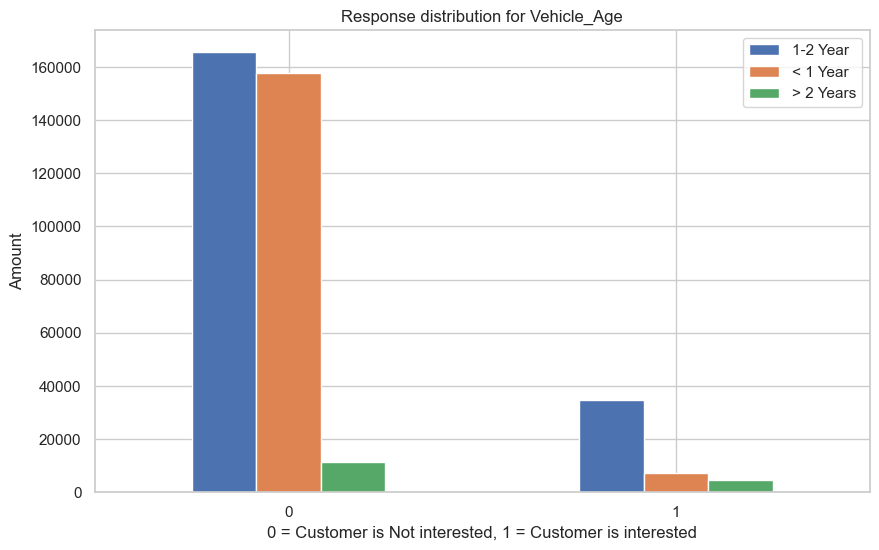

In [28]:
pd.crosstab(df_train['Response'], df_train['Vehicle_Age']).plot(kind="bar", figsize=(10,6))

plt.title("Response distribution for Vehicle_Age")
plt.xlabel("0 = Customer is Not interested, 1 = Customer is interested")
plt.ylabel("Amount")
plt.legend(["1-2 Year", "< 1 Year", "> 2 Years"])
plt.xticks(rotation=0);

In [29]:
df_train['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [30]:
pd.crosstab(df_train['Response'], df_train['Vehicle_Damage'])

Vehicle_Damage,No,Yes
Response,,
0,187714,146685
1,982,45728


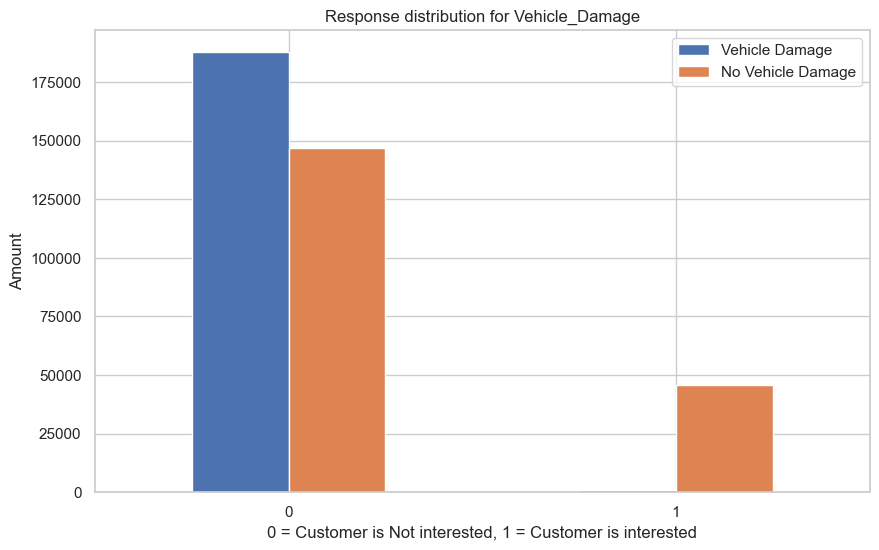

In [31]:
pd.crosstab(df_train['Response'], df_train['Vehicle_Damage']).plot(kind="bar", figsize=(10,6))

plt.title("Response distribution for Vehicle_Damage")
plt.xlabel("0 = Customer is Not interested, 1 = Customer is interested")
plt.ylabel("Amount")
plt.legend(["Vehicle Damage", "No Vehicle Damage"])
plt.xticks(rotation=0);

In [32]:
df_train['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

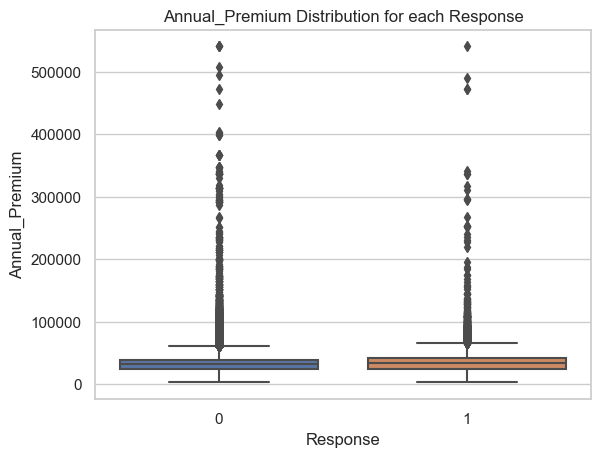

In [33]:
b = sns.boxplot(y='Annual_Premium', x='Response', data=df_train);
b.set_title("Annual_Premium Distribution for each Response");

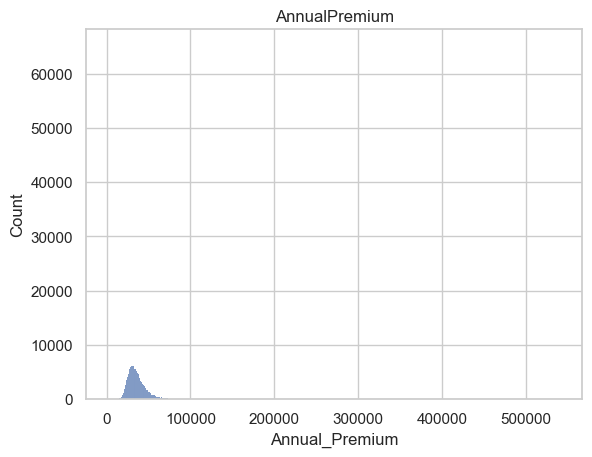

In [34]:
b = sns.histplot(df_train['Annual_Premium'])
b.set_title("AnnualPremium");

In [35]:
new_df=[df_train]

In [36]:
for dataset in new_df:
    
    dataset.loc[(dataset["Annual_Premium"]>= 2630)&(dataset["Annual_Premium"]<=25000),"Annual_Premium"]=0
    dataset.loc[(dataset["Annual_Premium"]> 25000)&(dataset["Annual_Premium"]<=50000),"Annual_Premium"]=1
    dataset.loc[(dataset["Annual_Premium"]> 50000),"Age"]=2
                                     

In [37]:
df_train.head(10)

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,28.0,0,> 2 Years,Yes,1.0,26.0,217,1
1,Male,76,3.0,0,1-2 Year,No,1.0,26.0,183,0
2,Male,47,28.0,0,> 2 Years,Yes,1.0,26.0,27,1
3,Male,21,11.0,1,< 1 Year,No,1.0,152.0,203,0
4,Female,29,41.0,1,< 1 Year,No,1.0,152.0,39,0
5,Female,24,33.0,0,< 1 Year,Yes,0.0,160.0,176,0
6,Male,23,11.0,0,< 1 Year,Yes,0.0,152.0,249,0
7,Female,56,28.0,0,1-2 Year,Yes,1.0,26.0,72,1
8,Female,24,3.0,1,< 1 Year,No,1.0,152.0,28,0
9,Female,32,6.0,1,< 1 Year,No,1.0,152.0,80,0


In [38]:
df_copy=df_train
def bar_chart(colunm):
    intrested=df_copy[df_copy["Response"]==1][colunm].value_counts()
    Not_interested=df_copy[df_copy["Response"]==0][colunm].value_counts()
    
    df_new=pd.DataFrame([intrested,Not_interested])
    df_new.index=["Customer is interested","Customer is Not interested"]
    df_new.plot(kind="bar",stacked=False,figsize=(8,4))
    plt.title("Response distribution for Gender")
    plt.ylabel("Amount")
    plt.legend(["0","1","2"])
    plt.xticks(rotation=0);

KeyboardInterrupt: 

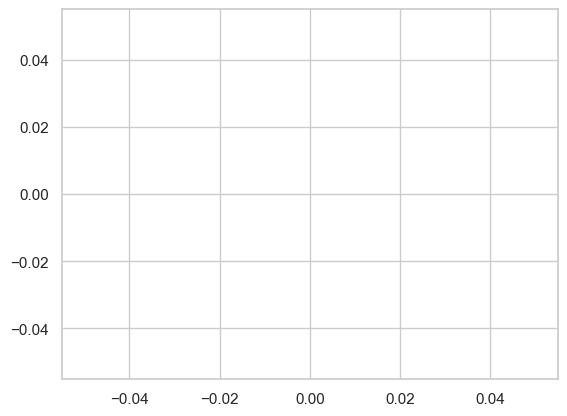

In [39]:
#b = sns.histplot(df_train["Annual_Premium"])
#b.set_title("");

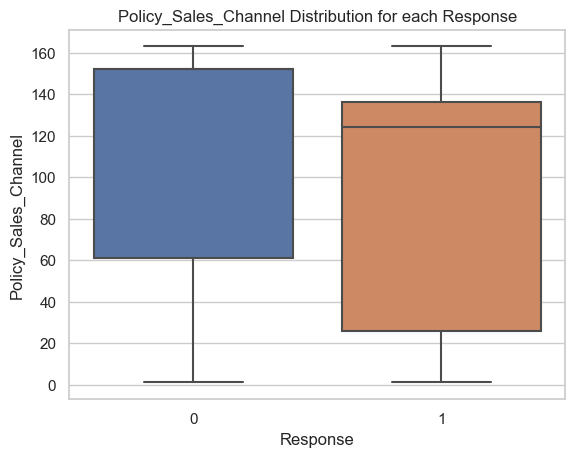

In [40]:
b = sns.boxplot(y='Policy_Sales_Channel', x='Response', data=df_train);
b.set_title("Policy_Sales_Channel Distribution for each Response");

In [41]:
df_train['Vintage'].describe()

count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

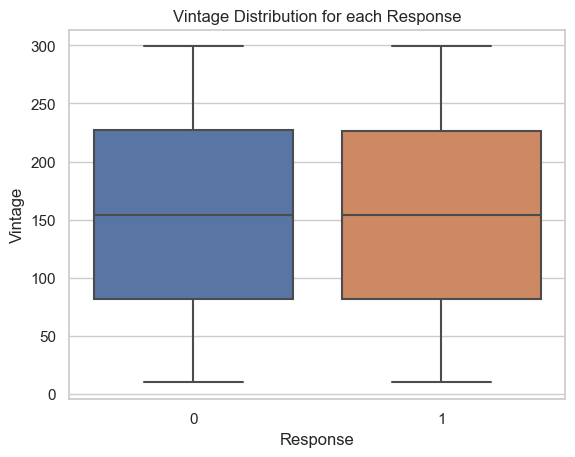

In [42]:
b = sns.boxplot(y='Vintage', x='Response', data=df_train);
b.set_title("Vintage Distribution for each Response");

In [43]:
df_train.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,28.0,0,> 2 Years,Yes,1.0,26.0,217,1
1,Male,76,3.0,0,1-2 Year,No,1.0,26.0,183,0
2,Male,47,28.0,0,> 2 Years,Yes,1.0,26.0,27,1
3,Male,21,11.0,1,< 1 Year,No,1.0,152.0,203,0
4,Female,29,41.0,1,< 1 Year,No,1.0,152.0,39,0


In [44]:
df_train['Gender'] = pd.Categorical(df_train['Gender'])
df_train['Previously_Insured'] = pd.Categorical(df_train['Previously_Insured'])
df_train['Vehicle_Age'] = pd.Categorical(df_train['Vehicle_Age'])
df_train['Vehicle_Damage'] = pd.Categorical(df_train['Vehicle_Damage'])
df_train['Response'] = pd.Categorical(df_train['Response'])
df_train['Region_Code'] = pd.Categorical(df_train['Region_Code'])


df_train = pd.concat([df_train[['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']],
                      
           pd.get_dummies(df_train[['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']])], axis=1)



In [45]:
df_train.head()

,Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Previously_Insured_0,Previously_Insured_1,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,44,1.0,26.0,217,1,0,1,1,0,0,0,1,0,1
1,76,1.0,26.0,183,0,0,1,1,0,1,0,0,1,0
2,47,1.0,26.0,27,1,0,1,1,0,0,0,1,0,1
3,21,1.0,152.0,203,0,0,1,0,1,0,1,0,1,0
4,29,1.0,152.0,39,0,1,0,0,1,0,1,0,1,0


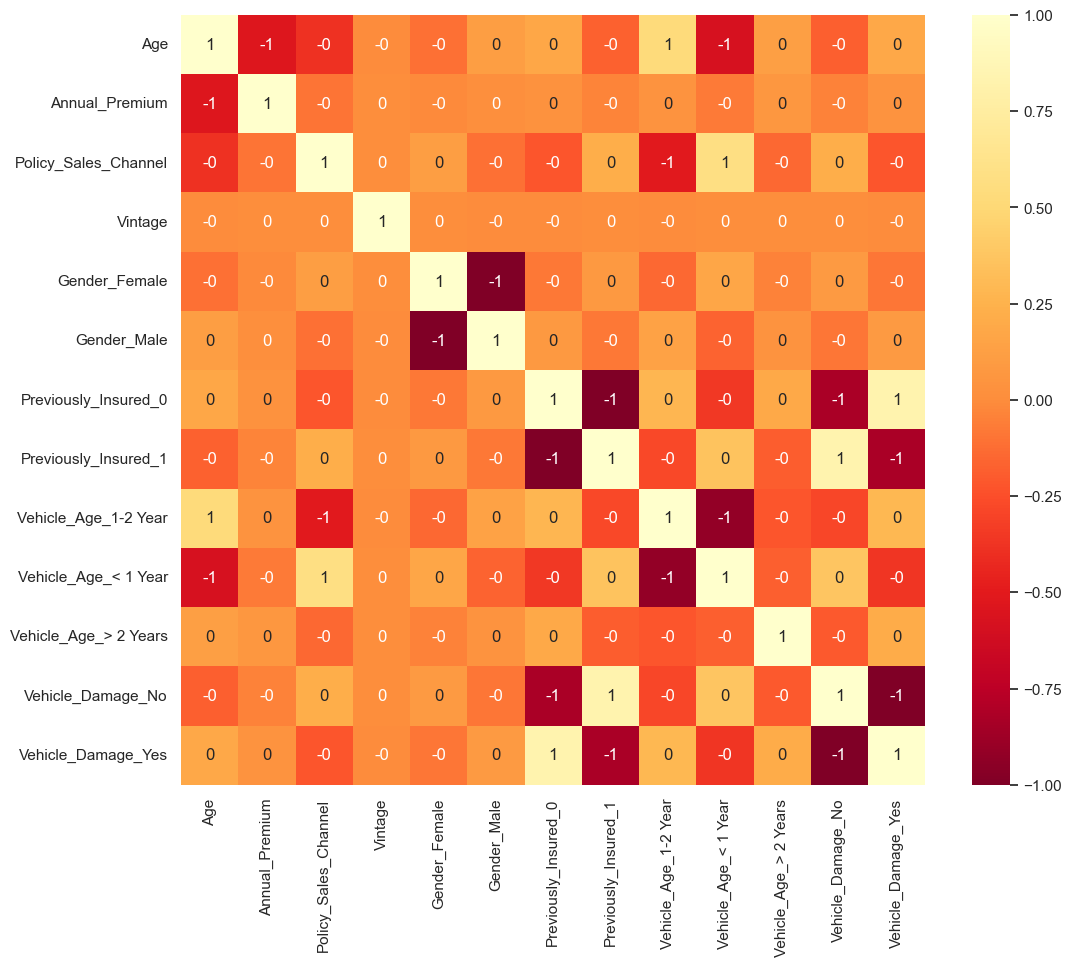

In [46]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_train.corr()
sns.heatmap(cor, annot=True, fmt=".0f",cmap="YlOrRd_r")
plt.show()

In [54]:
x = df_train.drop(["Response"], axis=1).to_numpy()
y = df_train['Response'].values

In [55]:
X_train=x
Y_test=df_train["Response"]
Y_train=y
X_test=df_train.drop(["Response"], axis=1).to_numpy()

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [56]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

87.37

In [63]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn 

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

90.71

In [59]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


87.74

In [60]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

86.57

In [61]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

96.33

In [62]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

96.33

In [65]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.71

In [66]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [ acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,96.33
6,Decision Tree,96.33
0,KNN,90.71
5,Linear SVC,87.74
1,Logistic Regression,87.37
4,Stochastic Gradient Decent,86.57
3,Naive Bayes,72.71
